# Stock Prediction Program
Objective : Build a program that predicts price of Google's stock for a specific day using machine learning


## 1. Import Dependencies

In [0]:
# import libraries
# import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# load dataset
from google.colab import files
uploaded = files.upload()

Saving google_30_days_stock.csv to google_30_days_stock.csv


## 2. Explore Dataset

In [0]:
# load dataset
df = pd.read_csv('google_30_days_stock.csv')

In [11]:
# top 5 rows
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-03,1065.500000,1065.500000,1025.000000,1036.229980,1036.229980,5130600
1,2019-06-04,1042.900024,1056.050049,1033.689941,1053.050049,1053.050049,2833500
2,2019-06-05,1051.540039,1053.550049,1030.489990,1042.219971,1042.219971,2168400
3,2019-06-06,1044.989990,1047.489990,1033.699951,1044.339966,1044.339966,1703200
4,2019-06-07,1050.630005,1070.920044,1048.400024,1066.040039,1066.040039,1802400


In [13]:
# features in dataset
for i in df.columns: print(i)

Date
Open
High
Low
Close
Adj Close
Volume


Data Dictionary
- `Date` : Date
- `Open` : Open price of the stock
- `High` : Highest price value in the day
- `Low`  : Lowest price value in the day
- `Close`: Closing price of the day

In [14]:
# get dimensions of dataset
print("Rows    : ", df.shape[0])
print("Columns : ", df.shape[1])

Rows    :  20
Columns :  7


In [16]:
# metadata - stats
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01
mean,1084.027002,1091.008508,1072.817352,1081.122504,1081.122504,1.704840e+06
std,24.280330,23.334569,26.193657,23.950249,23.950249,9.246559e+05
min,1042.900024,1047.489990,1025.000000,1036.229980,1036.229980,9.416000e+05
25%,1071.109985,1078.427551,1062.755035,1073.517517,1073.517517,1.224375e+06
50%,1085.140015,1092.829956,1076.446533,1080.645019,1080.645019,1.450450e+06
75%,1106.509980,1108.837494,1088.080017,1094.957489,1094.957489,1.804525e+06
max,1119.989990,1124.109985,1111.010010,1121.880005,1121.880005,5.130600e+06


In [17]:
# metadata - features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
Date         20 non-null object
Open         20 non-null float64
High         20 non-null float64
Low          20 non-null float64
Close        20 non-null float64
Adj Close    20 non-null float64
Volume       20 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.2+ KB


- All float & int datatypes
- Date is object
- No missing data

## 3. Data Preparation - Create X & y datasets

- X = independent variables 
- y = Dependent variables

In [19]:
# get the last row of the dataset
# this will be used to make predictions
df.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume
19,2019-06-28,1076.390015,1081.0,1073.369995,1080.910034,1080.910034,1693200


In [20]:
# get all data except the last row
df = df.head(len(df)-1)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-06-03,1065.500000,1065.500000,1025.000000,1036.229980,1036.229980,5130600
1,2019-06-04,1042.900024,1056.050049,1033.689941,1053.050049,1053.050049,2833500
2,2019-06-05,1051.540039,1053.550049,1030.489990,1042.219971,1042.219971,2168400
3,2019-06-06,1044.989990,1047.489990,1033.699951,1044.339966,1044.339966,1703200
4,2019-06-07,1050.630005,1070.920044,1048.400024,1066.040039,1066.040039,1802400


In [21]:
# get dimensions of dataset
print("Rows    : ", df.shape[0])
print("Columns : ", df.shape[1])

Rows    :  19
Columns :  7


- last row removed
- data successfully prepared

In [0]:
# get all records from the 'Date' column
df_dates = df.loc[:,'Date']
# get all records from the 'Open' column
df_open = df.loc[:,'Open']

In [28]:
# print dataset
print('df_dates')
print(df_dates.head(2))
print('\ndf_open')
print(df_open.head(2))

df_dates
0    2019-06-03
1    2019-06-04
Name: Date, dtype: object

df_open
0    1065.500000
1    1042.900024
Name: Open, dtype: float64


In [0]:
# create lists to store these data
dates = []
prices = []

In [0]:
# create the independent dataset - X
for date in df_dates:
  dates.append([int(date.split('-')[2])])  # get the date and append in list, convert into int datatype then add in array

In [35]:
df['Date']

0     2019-06-03
1     2019-06-04
2     2019-06-05
3     2019-06-06
4     2019-06-07
5     2019-06-10
6     2019-06-11
7     2019-06-12
8     2019-06-13
9     2019-06-14
10    2019-06-17
11    2019-06-18
12    2019-06-19
13    2019-06-20
14    2019-06-21
15    2019-06-24
16    2019-06-25
17    2019-06-26
18    2019-06-27
Name: Date, dtype: object

In [36]:
print(dates) 

[[3], [4], [5], [6], [7], [10], [11], [12], [13], [14], [17], [18], [19], [20], [21], [24], [25], [26], [27]]


In [0]:
# create the dependent dataset - y
for i in df_open:
  prices.append(i)

In [38]:
prices

[1065.5,
 1042.900024,
 1051.540039,
 1044.98999,
 1050.630005,
 1072.97998,
 1093.97998,
 1078.0,
 1083.640015,
 1086.420044,
 1086.280029,
 1109.689941,
 1105.599976,
 1119.98999,
 1109.23999,
 1119.609985,
 1112.660034,
 1086.5,
 1084.0]

## 4. Model Building

In [0]:
# import libraries
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR # Support Vector Regressor
from sklearn.model_selection import train_test_split

In [0]:
# UDF for model prediction - Regression
def predict_prices(dates, prices, x): # x - date

  # create 3 Support Vector Regression models
  svr_lin = SVR(kernel='linear', C=1e3)
  svr_poly = SVR(kernel='poly', C=1e3, degree=2)
  svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

  # train the SVR models
  svr_lin.fit(dates, prices)
  svr_poly.fit(dates, prices)
  svr_rbf.fit(dates, prices)

  # create a Linear Regression model
  lin_reg = LinearRegression()

  # train Linear Regression model
  lin_reg.fit(dates, prices)

  # plot the models to see the best fit
  plt.scatter(dates, prices, color='black', label='Data')
  plt.plot(dates, svr_lin.predict(dates), color='green', label='SVR LIN')
  plt.plot(dates, svr_poly.predict(dates), color='blue', label='SVR POLY')
  plt.plot(dates, svr_rbf.predict(dates), color='red', label='SVR RBF')
  plt.plot(dates, lin_reg.predict(dates), color='orange', label='LIN REG')
  plt.xlabel('Days')
  plt.ylabel('Price')
  plt.title('Regression')
  plt.legend()
  plt.show()

  # return model
  return svr_lin.predict(x)[0], svr_rbf.predict(x)[0], svr_poly.predict(x)[0], lin_reg.predict(x)[0]


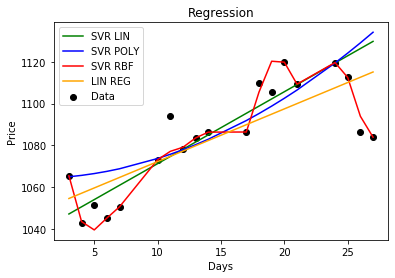

(1133.3133133337788,
 1091.7058004910944,
 1139.5478482146918,
 1117.7087934280248)

In [48]:
# predict the price of Google on day = 28 (2019-06-28)
# Expecting a price = 1076.390015
predicted_price = predict_prices(dates, prices, [[28]])
predicted_price


## Observations
- The linear **Support Vector Regression (svr_lin)** model predicts the price the closest
- Then Linear Regression model predicted the second closest model
- SVR RBF model overfitted the dataset